#Lab-10

Implement Dimensionality reduction using Principle
Component Analysis (PCA) method.

In [1]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


To Do: Implementation – PCA

Write Python code to implement the following. Consider dataset files as “heart.csv”

Convert text columns to numbers using label encoding and one hot encoding

Apply scaling

Build a classification model using various methods (SVM, logistic regression, random forest) and
check which model gives you the best accuracy

Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model
in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but
computation is much lighter and that's the trade off you need to consider while building models in
real life.

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
SVM Accuracy without PCA: 0.8587
Logistic Regression Accuracy without PCA: 0.8424
Random Forest Accuracy without PCA: 0.8641
SVM Accuracy with PCA: 0.8750
Logistic Regression Accuracy with PCA: 0.8478
Random

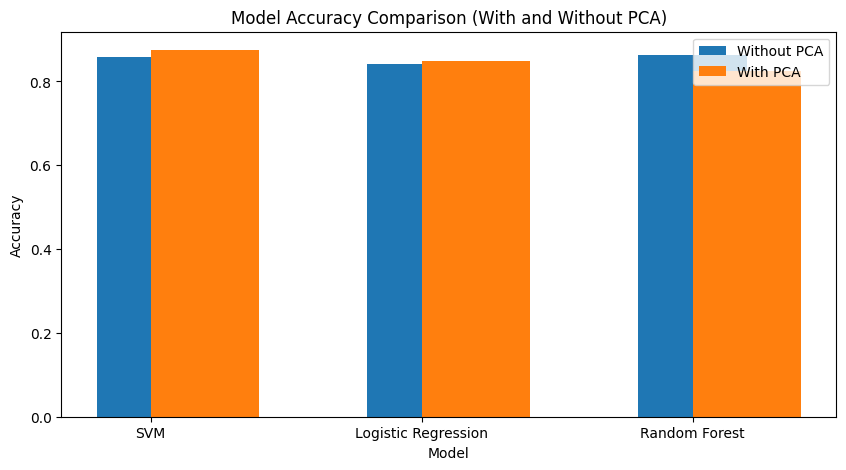

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset (replace with your own file path)
data = pd.read_csv("heart.csv")

# Display first few rows to understand the dataset structure
print(data.head())

# Encode categorical columns using Label Encoding
label_encoder = LabelEncoder()

# Label Encoding for 'Sex', 'RestingECG', 'ExerciseAngina', and 'ST_Slope'
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'])

# One Hot Encoding for 'ChestPainType' (if necessary, based on dataset)
data = pd.get_dummies(data, columns=['ChestPainType'], drop_first=True)

# Split data into features and target
X = data.drop("HeartDisease", axis=1)  # Features
y = data["HeartDisease"]  # Target

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and evaluate the models: SVM, Logistic Regression, and Random Forest
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models without PCA
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy without PCA: {accuracy:.4f}")

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train and evaluate models with PCA
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy with PCA: {accuracy:.4f}")

# Plotting the accuracy comparison (without PCA vs with PCA)
accuracies_without_pca = []
accuracies_with_pca = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies_without_pca.append(accuracy_score(y_test, y_pred))

    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracies_with_pca.append(accuracy_score(y_test, y_pred))

# Bar plot comparison
labels = list(models.keys())
x = range(len(models))

plt.figure(figsize=(10, 5))
plt.bar(x, accuracies_without_pca, width=0.4, label='Without PCA', align='center')
plt.bar(x, accuracies_with_pca, width=0.4, label='With PCA', align='edge')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (With and Without PCA)")
plt.xticks(x, labels)
plt.legend()
plt.show()
